In [69]:
import pandas as pd

In [70]:
GT_LABELS = pd.read_csv("C:\\Users\\alexa\\Desktop\\EPIC-Kitchen100\\Val_set_hsne\\anno_val_set_segm.csv", header=0)
VERBS = pd.read_csv("C:\\Users\\alexa\\Desktop\\EPIC-Kitchen100\\EPIC_100_verb_classes.csv", header=0, index_col='id')

In [71]:
verbs = {}
for i,row in VERBS.iterrows():
    temp_row = row["instances"][1:-1].replace(" ","").replace("'","").split(',')
    verbs[row["key"]] = temp_row
    
print(verbs)


{'take': ['collect-from', 'collect-into', 'draw', 'fetch', 'get', 'get-from', 'get-in', 'get-off', 'get-with', 'grab', 'grab-down', 'grab-from', 'grab-up', 'pick', 'pick-from', 'pick-off', 'pick-up', 'pull-off', 'retrieve', 'take', 'take-from', 'take-in', 'take-of', 'take-to', 'take-up', 'unload', 'catch', 'take-into', 'remove-on', 'get-on', 'take-with', 'take-inside', 'take-on', 'take-down'], 'put': ['create', 'dose', 'lay', 'lay-down', 'lay-on', 'lay-onto', 'lay-out', 'layer', 'leave', 'leave-in', 'leave-with', 'lie', 'pace', 'place', 'place-away', 'place-back', 'place-down', 'place-on', 'place-onto', 'place-that', 'pose', 'position', 'pout', 'put', 'put-around', 'put-aside', 'put-away', 'put-back', 'put-down', 'put-from', 'put-of', 'put-on', 'put-onto', 'put-over', 'put-to', 'put-under', 'put-up', 'put-with', 'replace', 'reposition', 'rest', 'rest-against', 'rest-on', 'rest-onto', 'reture', 'return', 'return-from', 'return-into', 'set-down', 'tuck-under', 'pet-down', 'save', 'store'

In [72]:
ing_dict = {
    'leaving': 'leave',
    'turning': 'turn',
    'scrubbing': 'scrub',
    'frying': 'fry',
    'pressing': 'press',
    'wiping': 'wipe',
    'pouring': 'pour',
    'mixing': 'mix',
    'slicing': 'slice',
    'sprinkling': 'sprinkle',
    'cutting': 'cut',
    'something': 'something',
    'dicing': 'dice',
    'separating': 'separate',
    'squeezing': 'squeeze',
    'selecting': 'select',
    'packaging': 'package',
    'covering': 'cover',
    'arranging': 'arrange',
    'grinding': 'grind',
    'starting': 'start',
    'adjusting': 'adjust',
    'closing': 'close',
    'transferring': 'transfer',
    'putting': 'put',
    'spooning': 'spoon',
    'chopping': 'chop',
    'washing': 'wash',
    'stirring': 'stir',
    'breaking': 'break',
    'draining': 'drain',
    'taking': 'take',
    'emptying': 'empty',
    'cooking': 'cook',
    'drying': 'dry',
    'cleaning': 'clean',
    'removing': 'remove',
    'stuffing': 'stuff',
    'rising': 'rise',
    'entering': 'enter',
    'placing': 'place',
    'bringing': 'bring',
    'opening': 'open',
    'searching': 'search',
    'squashing': 'squash',
    'wearing': 'wear',
    'looking': 'look',
    'continuing': 'continue',
    'rinsing': 'rinse'
}

In [73]:
from collections import defaultdict
labels_dict = defaultdict(int)
ing_list = set()
for label in GT_LABELS["segment_label"]:
    current_label = label
    ok = 0
    if label != "none":
        label_split = current_label.split()
        for l in label_split:
            if l == "stare":
                labels_dict["look"] += 1
                ok = 1
            elif l == "lid":
                labels_dict["uncover"] += 1
                ok = 1
            elif l == "fish":
                labels_dict["remove"] += 1
                ok = 1
            elif l == "thrown":
                labels_dict["throw"] += 1
                ok = 1
            elif l == "sit":
                labels_dict["transition"] += 1
                ok = 1
            elif l == "stacks":
                labels_dict["sort"] += 1
                ok = 1
            else:
                for k in list(verbs.keys()):
                    if l in verbs[k]:
                        labels_dict[k] += 1
                        ok = 1
                        break
                if ok == 1:
                    break
                if "ing" in l:
                    for k in list(verbs.keys()):
                        if ing_dict[l] in verbs[k]:
                            labels_dict[k] += 1
                            ok = 1
                            break
            if ok == 1:
                break
    if ok == 0 and label != "none":
        print(label)
print(labels_dict)

defaultdict(<class 'int'>, {'take': 7429, 'put': 10586, 'fold': 219, 'open': 3045, 'throw': 563, 'close': 1757, 'dry': 768, 'cut': 3994, 'turn': 1641, 'wash': 11418, 'squeeze': 421, 'hang': 32, 'wrap': 311, 'remove': 973, 'move': 1024, 'pull': 42, 'unroll': 16, 'shake': 349, 'pour': 2624, 'drink': 50, 'lift': 17, 'crush': 268, 'rip': 69, 'look': 277, 'check': 191, 'mix': 5799, 'adjust': 318, 'eat': 167, 'filter': 242, 'sprinkle': 57, 'empty': 317, 'hold': 64, 'scoop': 576, 'set': 90, 'press': 119, 'knead': 352, 'apply': 604, 'roll': 193, 'add': 345, 'wear': 11, 'fill': 266, 'measure': 76, 'scrape': 139, 'peel': 1149, 'unwrap': 99, 'smell': 2, 'attach': 69, 'flip': 72, 'insert': 52, 'serve': 121, 'uncover': 11, 'transition': 50, 'unscrew': 40, 'pat': 33, 'screw': 91, 'choose': 59, 'season': 87, 'sort': 139, 'spray': 66, 'turn-on': 55, 'wait': 37, 'use': 204, 'stab': 56, 'break': 94, 'cook': 299, 'switch': 57, 'gather': 60, 'brush': 90, 'scrub': 186, 'drop': 11, 'divide': 316, 'finish': 

In [74]:
print(labels_dict)

defaultdict(<class 'int'>, {'take': 7429, 'put': 10586, 'fold': 219, 'open': 3045, 'throw': 563, 'close': 1757, 'dry': 768, 'cut': 3994, 'turn': 1641, 'wash': 11418, 'squeeze': 421, 'hang': 32, 'wrap': 311, 'remove': 973, 'move': 1024, 'pull': 42, 'unroll': 16, 'shake': 349, 'pour': 2624, 'drink': 50, 'lift': 17, 'crush': 268, 'rip': 69, 'look': 277, 'check': 191, 'mix': 5799, 'adjust': 318, 'eat': 167, 'filter': 242, 'sprinkle': 57, 'empty': 317, 'hold': 64, 'scoop': 576, 'set': 90, 'press': 119, 'knead': 352, 'apply': 604, 'roll': 193, 'add': 345, 'wear': 11, 'fill': 266, 'measure': 76, 'scrape': 139, 'peel': 1149, 'unwrap': 99, 'smell': 2, 'attach': 69, 'flip': 72, 'insert': 52, 'serve': 121, 'uncover': 11, 'transition': 50, 'unscrew': 40, 'pat': 33, 'screw': 91, 'choose': 59, 'season': 87, 'sort': 139, 'spray': 66, 'turn-on': 55, 'wait': 37, 'use': 204, 'stab': 56, 'break': 94, 'cook': 299, 'switch': 57, 'gather': 60, 'brush': 90, 'scrub': 186, 'drop': 11, 'divide': 316, 'finish': 

In [64]:
# sum_labels = 0
# for k in list(labels_dict.keys()):
#     sum_labels += labels_dict[k]
# print(sum_labels)

61619


In [65]:
# c = 0
# for label in GT_LABELS["segment_label"]:
#     if label != "none":
#         c += 1
# print(c)

61619


In [75]:
amount_annotated = {}
for k in list(labels_dict.keys()):
    amount_annotated[k] = 0

final_annotated_human = []
with open("C:\\msc\\msc\\Experiments_output\\Epic-Kitchen_exp\\Annotating_human_drilling.txt", "r") as file:
    for line in file:
        splits = line.split(",")
        for split in splits:
            if split != "0":
                points = split.split("-")
                values = points[0]
                key = points[1]
                amount_annotated[key] += int(values)
            annotated = []
            for k in list(amount_annotated.keys()):
                annotated.append(min(amount_annotated[k]/labels_dict[k],1))                
            final_annotated_human.append(sum(annotated)/len(annotated))

final_annotated_human_y = range(len(final_annotated_human))

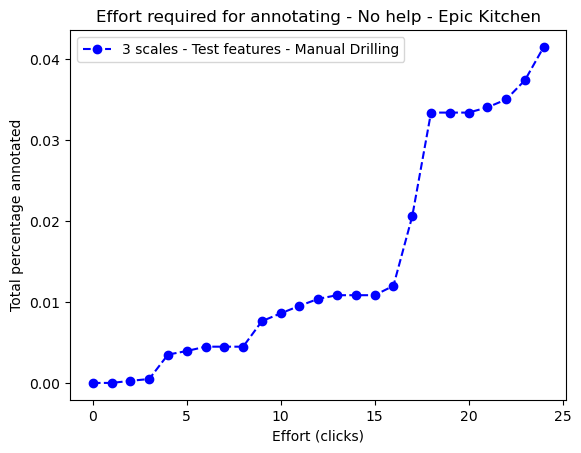

In [78]:
import matplotlib.pyplot as plt

plt.plot(final_annotated_human_y,final_annotated_human,"bo--",label="3 scales - Test features - Manual Drilling")

plt.title("Effort required for annotating - No help - Epic Kitchen")
plt.xlabel("Effort (clicks)")
plt.ylabel("Total percentage annotated")
plt.legend()
# plt.savefig("C:\\msc\\msc\\Experiments_output\\annotating_effort_uni.png")
plt.show()